# Introduction

This is a Data science Regression Project with the aim to Predict Home Prices in Perth, Australia.

The dataset was downloaded from: https://www.kaggle.com/datasets/syuzai/perth-house-prices/data


In [385]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Exploration

In [340]:
#import dataset
df = pd.read_csv('/kaggle/input/perth-housing-prediction/Perth_Housing_Prediction.csv')
df.head (5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [341]:
df.shape

(33656, 19)

In [342]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [343]:
#drop unrequired features
df = df.drop(['NEAREST_SCH_RANK', 'CBD_DIST', 'LONGITUDE', 'LATITUDE', 'ADDRESS', 'POSTCODE', 
              'NEAREST_STN', 'NEAREST_STN_DIST', 'NEAREST_SCH', 'NEAREST_SCH_DIST',
              'DATE_SOLD', 'BUILD_YEAR'], axis='columns', errors='ignore')

#Add additional feature
df['TOTAL_ROOMS'] = df['BEDROOMS'] + df['BATHROOMS']
df.columns

Index(['SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'TOTAL_ROOMS'],
      dtype='object')

# Data Cleaning

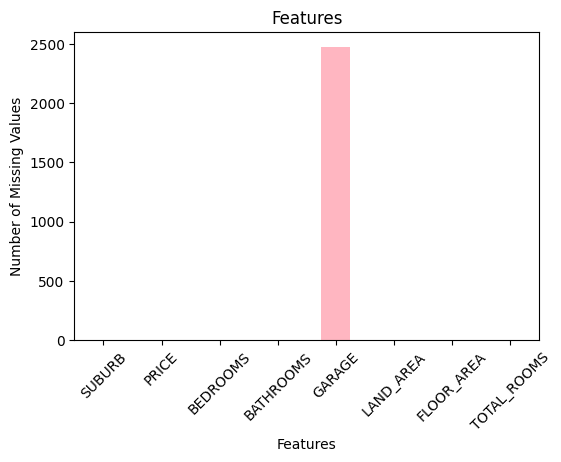

In [344]:
#check for NA values
no_values = df.isnull().sum()

plt.figure(figsize=(6, 4))
no_values.plot(kind='bar', color='lightpink')
plt.title('Features')
plt.ylabel('Number of Missing Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

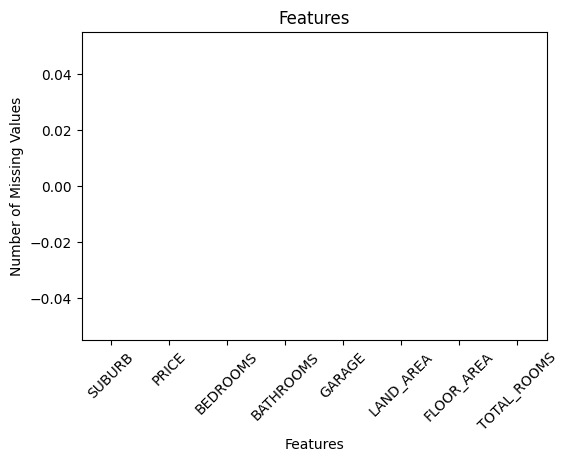

In [345]:
#drop NA values
df2 = df.dropna()

new_no_values = df2.isnull().sum()
plt.figure(figsize=(6, 4))
new_no_values.plot(kind='bar', color='lightpink')
plt.title('Features')
plt.ylabel('Number of Missing Values')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [346]:
df2.shape

(31178, 8)

# Exploratory Data Analysis (EDA)


- Boxplot for outlier finding and single feature distribution understanding (maybe remove)
- Pairplot to understand relationships between multiple features and how they relate to each other and to price, can use to explain using price_per_sqft or even bedrooms bathrooms relationship




**Histogram Analysis**

* The histogram analysis shows a right-skewed price distribution, with most properties priced between 400,000 and 500,000 AUD. This indicates that while most homes are on the lower end, a few significantly higher-priced properties skew the distribution to the right.
* In terms of property features, houses with four bedrooms are the most common, with three-bedroom homes being nearly as dominant. On the other hand, one-bedroom houses are exceedingly rare. 
* The most common configuration for both bathrooms and garages is two, reflecting a preference for properties with multiple functional spaces.

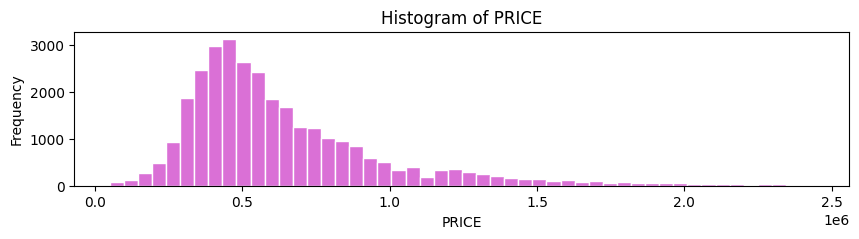

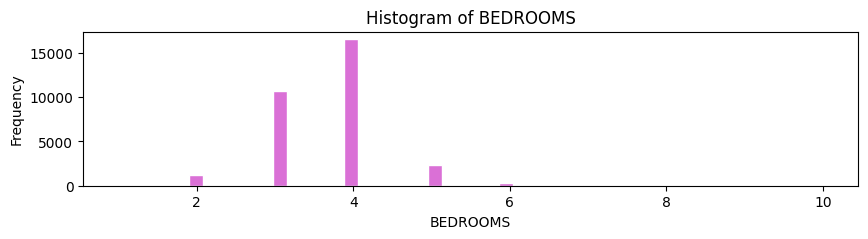

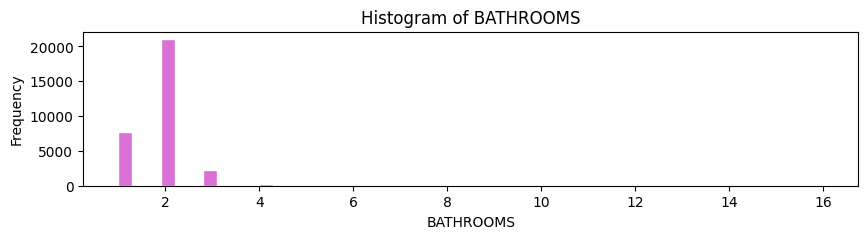

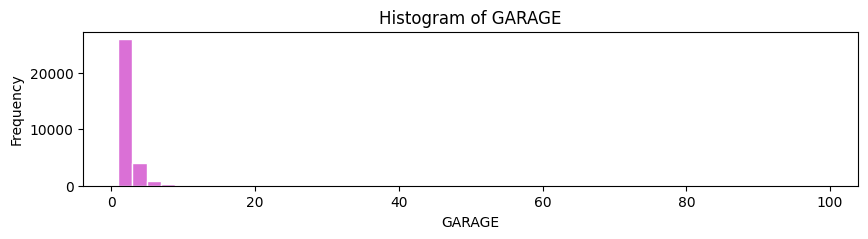

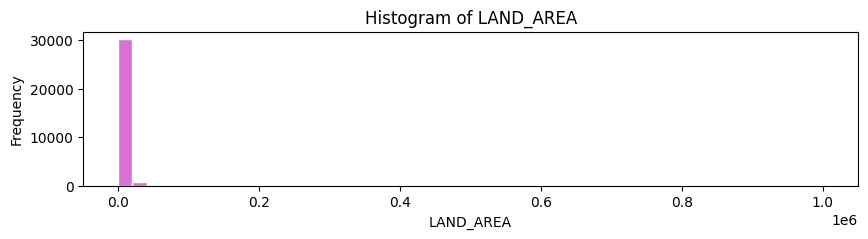

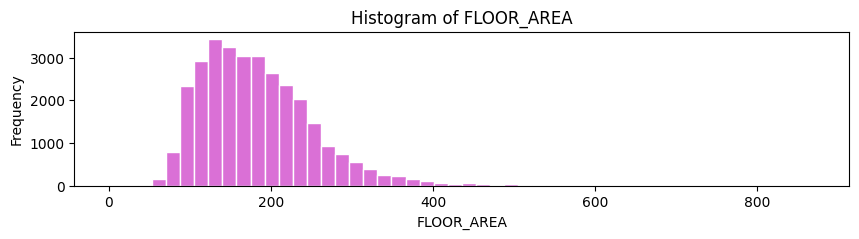

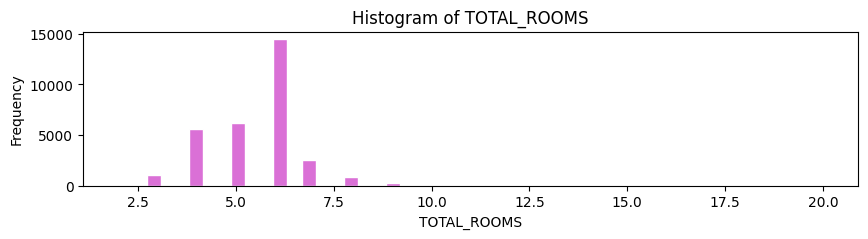

In [347]:
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

#histogram
for column in numeric_columns:
    plt.figure(figsize=(10, 2))
    plt.hist(df2[column], bins=50, color='orchid', edgecolor='white')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Correlation Matrix Analysis**
* The floor area has the highest correlation with price, indicating that larger areas generally lead to higher prices. However, the correlation is moderate, so while floor area is important, it doesn't fully account for price variations.
* The significant correlation between floor area with the number of bedrooms and bathrooms suggests that homes with larger floor areas typically have more bedrooms and bathrooms, which might indirectly influence the price.
* The land area has the weakest correlation with the price which indicates that land size has a minimal direct impact on the price of housing in Perth, suggesting that buyers may value other aspects of the property more.

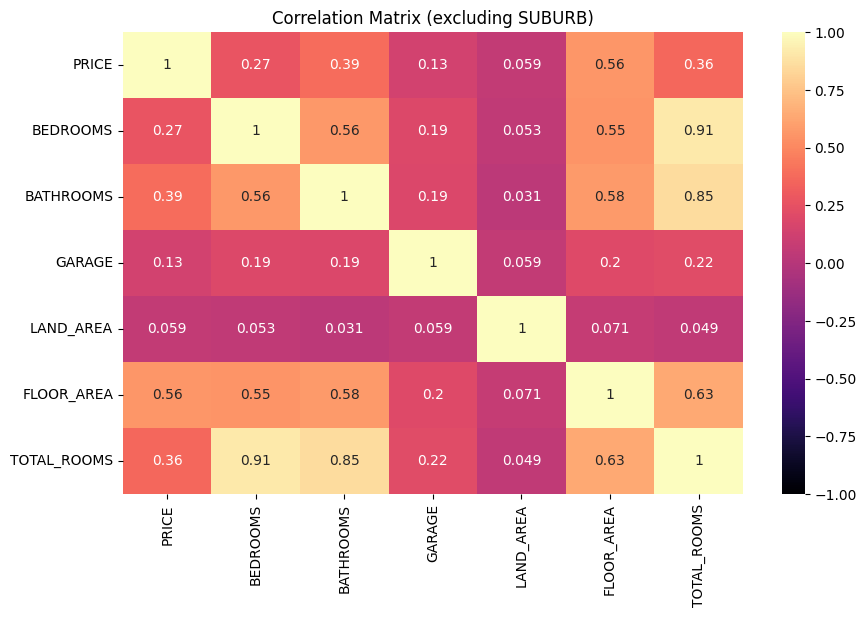

In [348]:
corr_matrix = df2.drop(columns='SUBURB').corr()

#correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix (excluding SUBURB)')
plt.show()

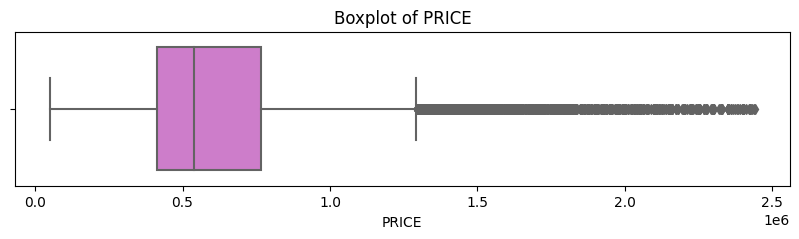

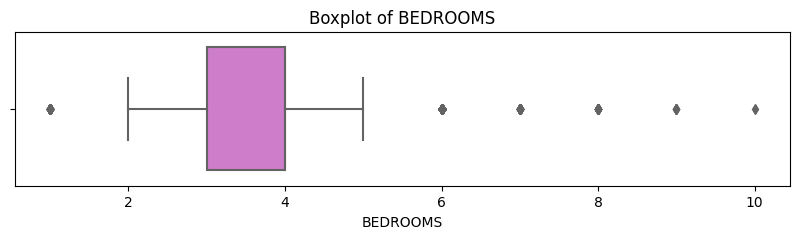

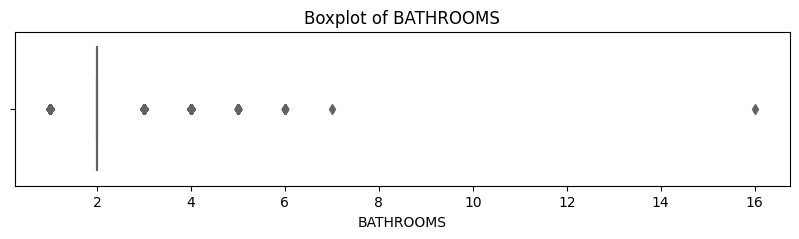

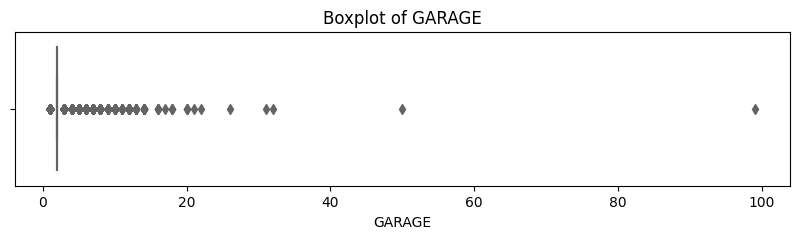

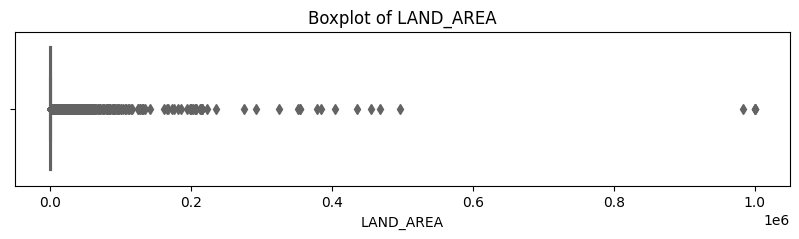

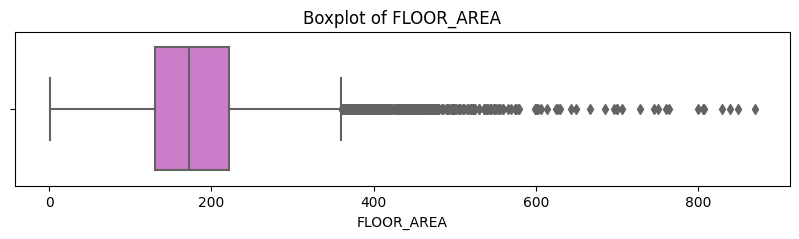

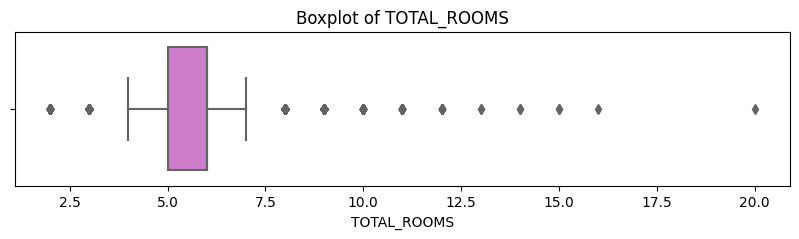

In [349]:
#boxplot might remove this
for column in numeric_columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df2[column], color='orchid', fliersize=5)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

**Pairplot Analysis**
- add it later

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

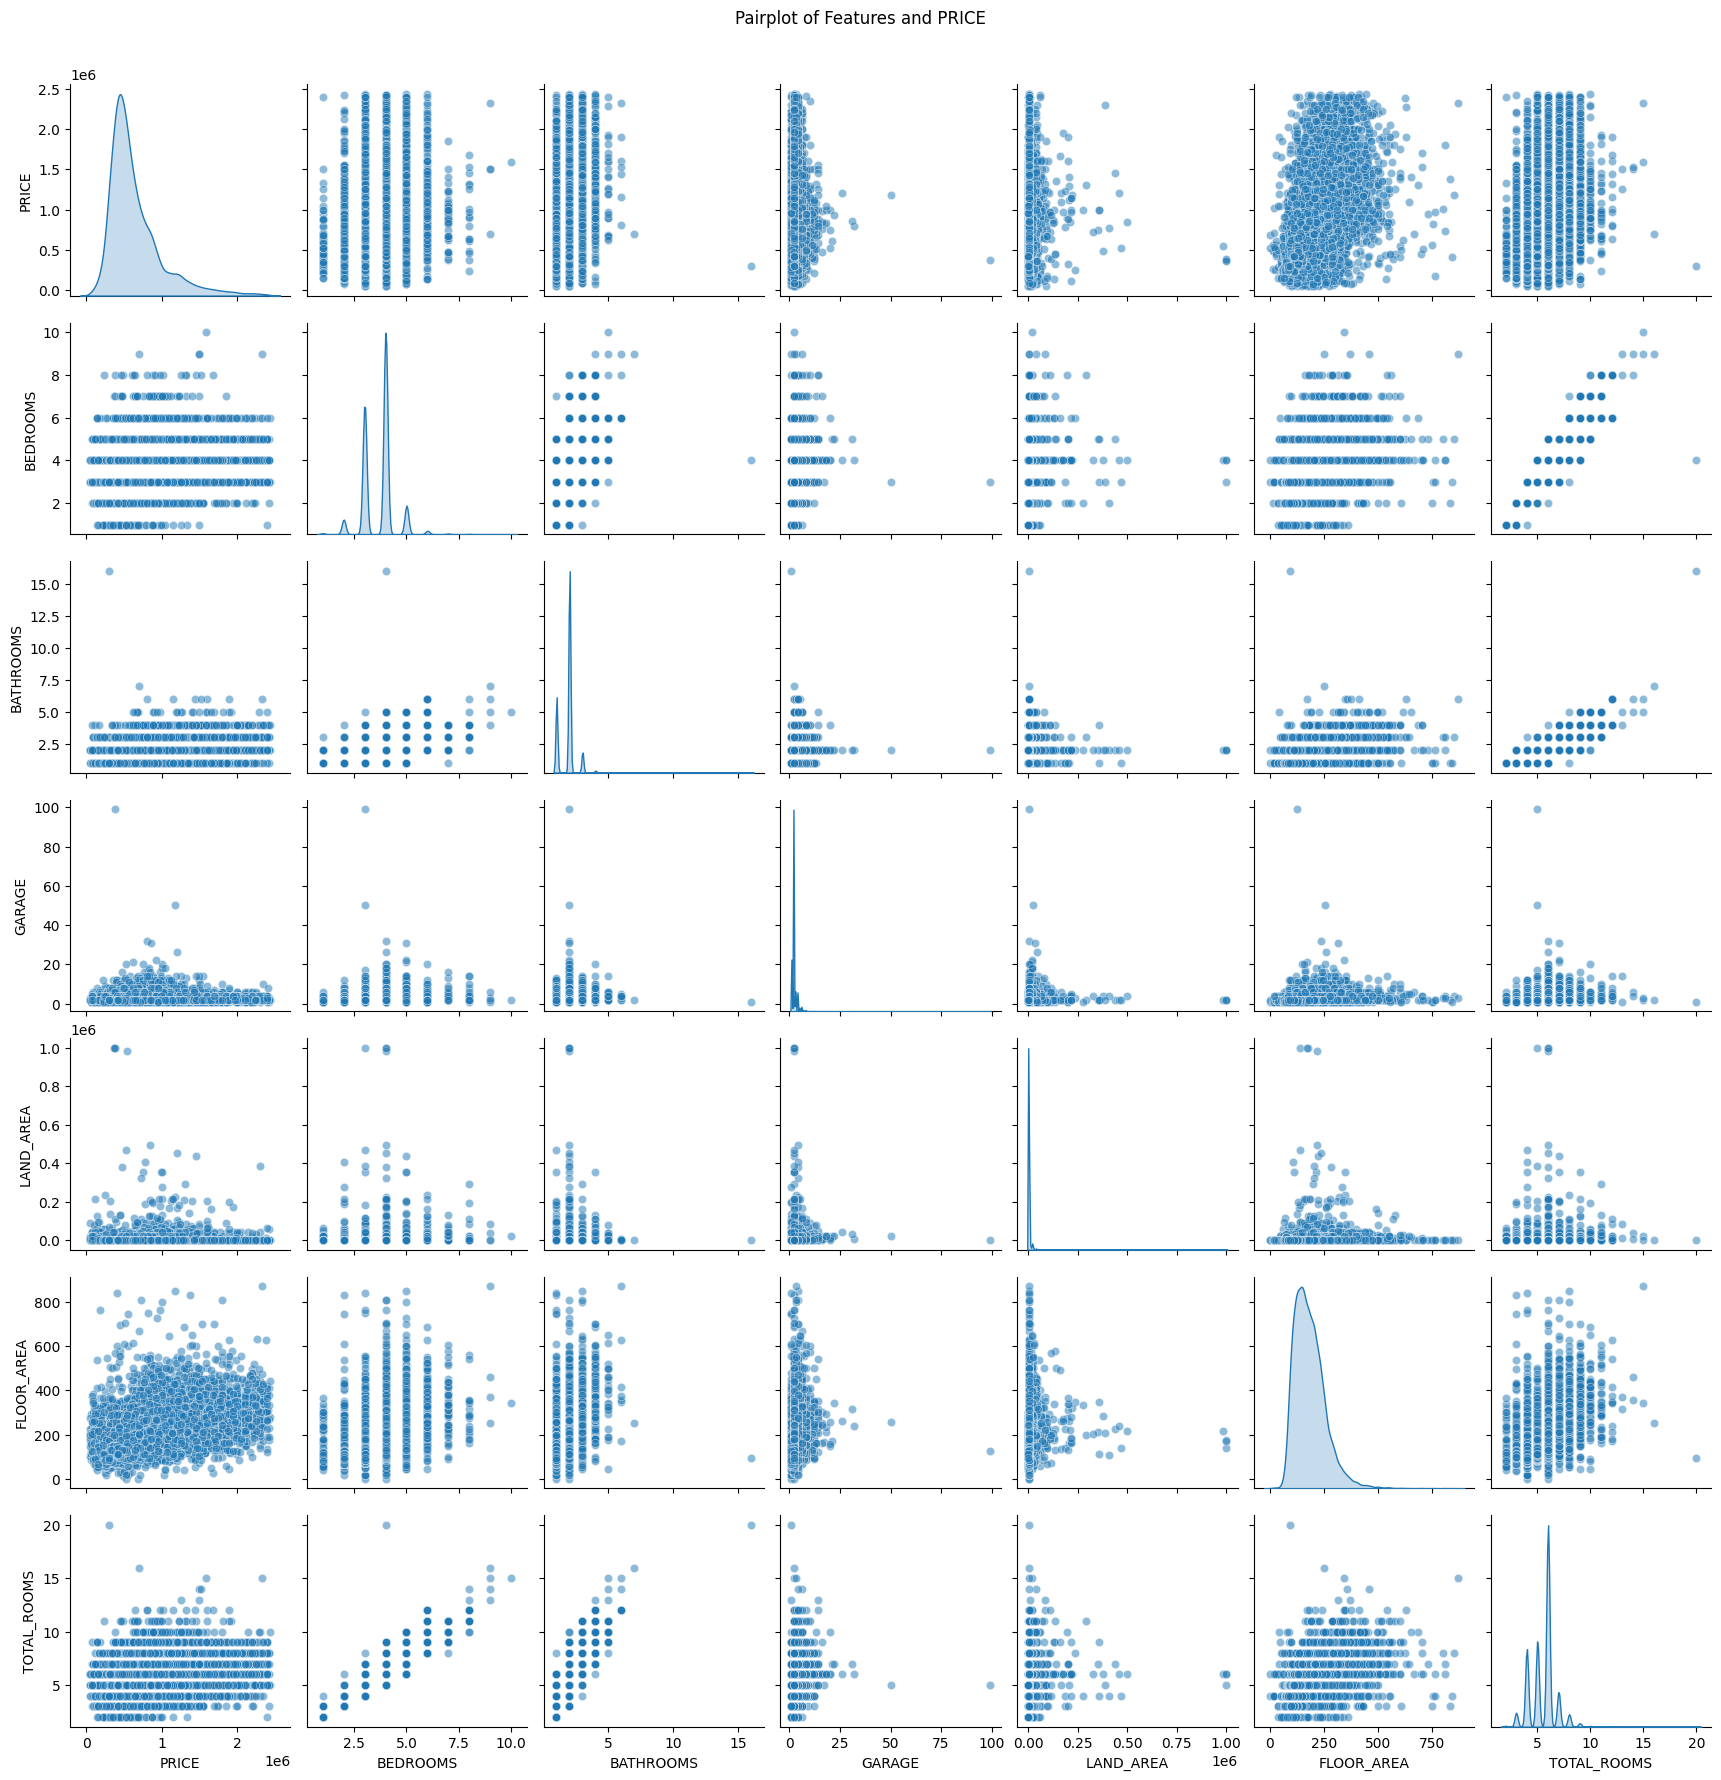

In [350]:
# pairplot
sns.pairplot(df2[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Features and PRICE', y=1.02)
plt.show()

# Data Engineering

**Outlier removal where number of bathrooms is more than number of bedrooms + 1**

Present are some extreme outliers, particularly the data point with 4 bedrooms and 16 bathrooms which depicts an unrealisitc relationship between the two features. The outlier was removed to reflect a more positive correlation. 

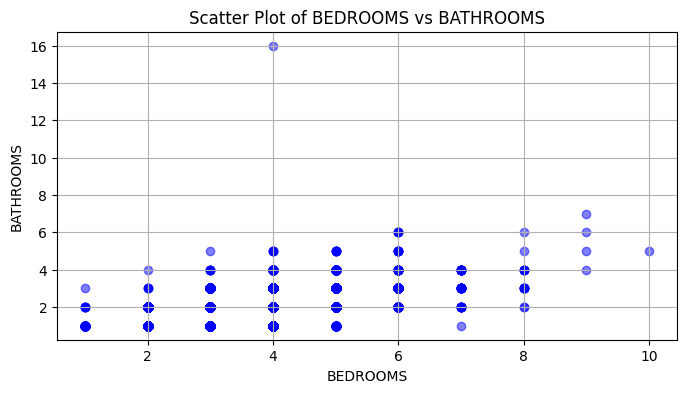

In [351]:
plt.figure(figsize=(8,4))
plt.scatter(df2['BEDROOMS'], df2['BATHROOMS'], alpha=0.5, c='blue')
plt.title('Scatter Plot of BEDROOMS vs BATHROOMS')
plt.xlabel('BEDROOMS')
plt.ylabel('BATHROOMS')
plt.grid(True)
plt.show()

In [352]:
df3 = df2[df2['BATHROOMS'] < df2['BEDROOMS'] + 1]

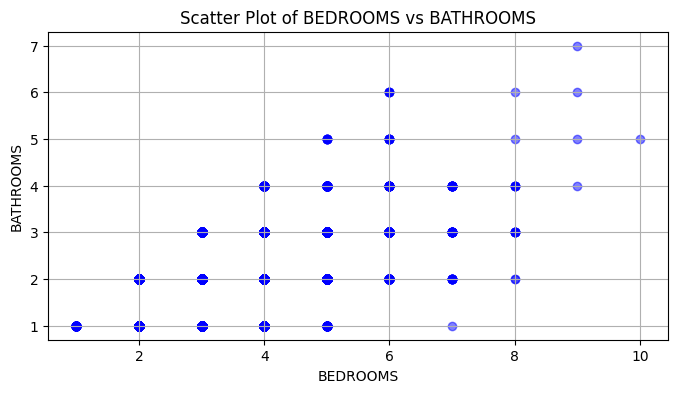

In [353]:
plt.figure(figsize=(8,4))
plt.scatter(df3['BEDROOMS'], df3['BATHROOMS'], alpha=0.5, c='blue')
plt.title('Scatter Plot of BEDROOMS vs BATHROOMS')
plt.xlabel('BEDROOMS')
plt.ylabel('BATHROOMS')
plt.grid(True)
plt.show()

**Outlier removal where number of garage is more than 15**

Although the number of garages has a relatively low correlation with the target variable, an unusually high or low number of garages compared to the majority may indicate the presence of outliers.

In [354]:
print (df3['GARAGE'].unique())

df4 = df3[df3['GARAGE'] <= 15]
print (df4['GARAGE'].unique())

[ 2.  1.  3.  8.  6.  4.  5.  7.  9. 10. 12. 32. 14. 16. 11. 13. 17. 18.
 21. 20. 99. 26. 22. 50. 31.]
[ 2.  1.  3.  8.  6.  4.  5.  7.  9. 10. 12. 14. 11. 13.]


**Dimensionality reduction for number of suburbs < 15**

Suburbs with fewer than 15 data points are tagged as "other" to reduce the number of categories and minimize dummy columns during one-hot encoding later on.

In [355]:
df4['SUBURB'].value_counts()

SUBURB
Bertram            224
Bennett Springs    201
Merriwa            201
Henley Brook       198
Mindarie           197
                  ... 
Hope Valley          3
Treeby               2
Kwinana Beach        1
Munster              1
Wangara              1
Name: count, Length: 319, dtype: int64

In [356]:
suburb_stats = df4.groupby('SUBURB')['SUBURB'].agg('count').sort_values(ascending=False)
suburbs_under_15 = suburb_stats[suburb_stats <= 15]
suburbs_under_15.count()

14

In [357]:
df5 = df4.copy()
df5['SUBURB'] = df4['SUBURB'].apply(lambda x: 'other' if x in suburbs_under_15 else x)
print(df5[df5['SUBURB'] == 'other'].head(5))

     SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
1339  other  580000         4          2     2.0        474         159   
1390  other  225000         4          2     1.0      19878         200   
1414  other  430000         3          2     2.0        432         177   
1564  other  440000         2          2     1.0        679         116   
1823  other  802000         3          1     3.0        491         142   

      TOTAL_ROOMS  
1339            6  
1390            6  
1414            5  
1564            4  
1823            4  


**Feature engineering**

* A new feature called price_per_sqft is created by diving price over floor area
* A new feature called total_rooms is created by adding bedrooms and bathrooms


In [358]:
df6['PRICE_PER_SQFT'] = df5['PRICE']/df5['FLOOR_AREA']

**Outlier removal via std and mean**

The minimum price per sqft is 187 and the maximum is 680,000, indicating significant price variation. To address this, we should remove outliers by applying a filter based on the mean and one standard deviation for each suburb.

In [359]:
df6.PRICE_PER_SQFT.describe()

count     31135.000000
mean       3661.040033
std        5148.254518
min         187.165775
25%        2574.144411
50%        3210.227273
75%        4218.570402
max      680000.000000
Name: PRICE_PER_SQFT, dtype: float64

In [360]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for suburb, subdf in df.groupby('SUBURB'):
        m = np.mean(subdf['PRICE_PER_SQFT'])
        st = np.std(subdf['PRICE_PER_SQFT'])
        reduced_df = subdf[(subdf['PRICE_PER_SQFT'] > (m - st)) & (subdf['PRICE_PER_SQFT'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_pps_outlier(df6)
df7.shape

(23851, 9)

**Outlier removal via business logic**

Properties within the same suburb where the price for a 6-room unit is less than that of a 5-room unit, given they have the same floor area, are considered outliers.

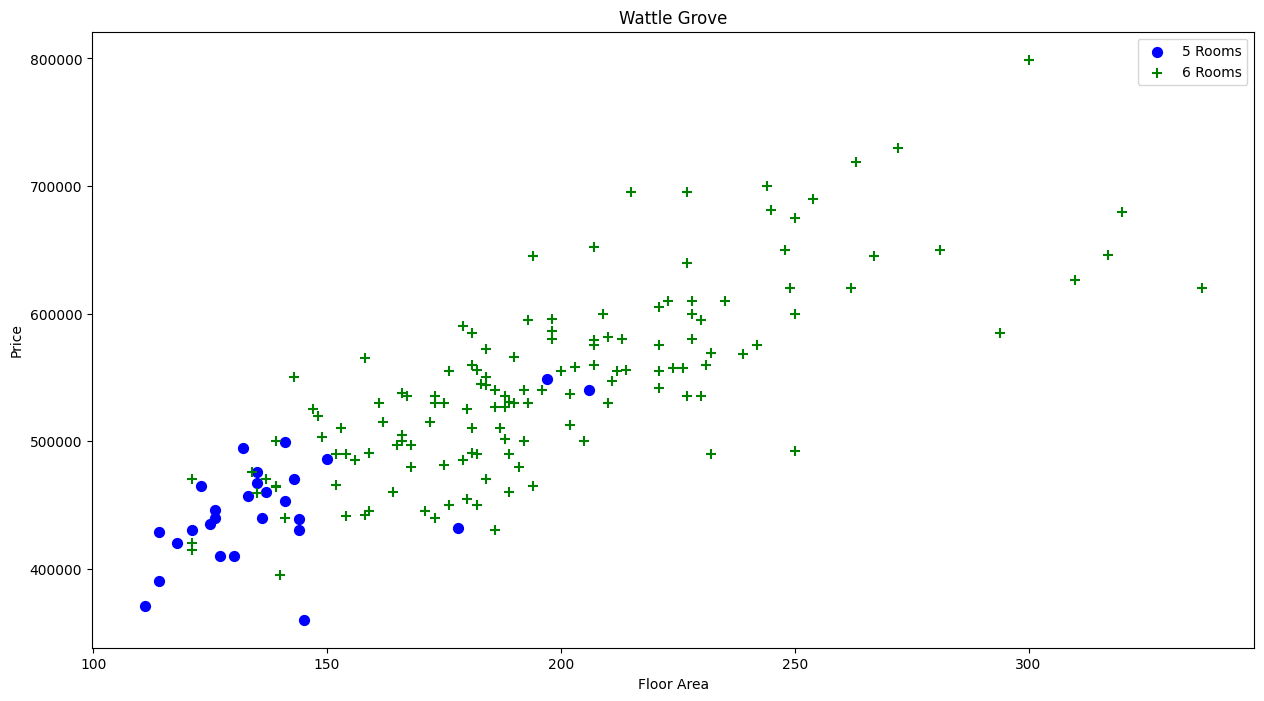

In [361]:
#Visualization of 5-unit and 6-unit properties

def plot_scatter_chart(df, suburb):
    if suburb not in df['SUBURB'].unique():
        print(f"No data available for suburb: {suburb}")
        return
    
    rooms5 = df[(df.SUBURB == suburb) & (df.TOTAL_ROOMS == 5)]
    rooms6 = df[(df.SUBURB == suburb) & (df.TOTAL_ROOMS == 6)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 8)
    plt.scatter(rooms5.FLOOR_AREA, rooms5.PRICE, color='blue', label='5 Rooms', s=50)
    plt.scatter(rooms6.FLOOR_AREA, rooms6.PRICE, marker='+', color='green', label='6 Rooms', s=50)
    plt.xlabel("Floor Area")
    plt.ylabel("Price")
    plt.title(suburb)
    plt.legend()
    plt.show()

plot_scatter_chart(df7, "Wattle Grove")


In [362]:
def remove_rooms_outliers(df):
    exclude_indices = np.array([])
    
    for suburb, suburb_df in df.groupby('SUBURB'):
        room_stats = {}
        
        for rooms, rooms_df in suburb_df.groupby('TOTAL_ROOMS'):
            room_stats[rooms] = {
                'mean': np.mean(rooms_df['FLOOR_AREA']),
                'std': np.std(rooms_df['FLOOR_AREA']),
                'count': rooms_df.shape[0]
            }

        for rooms, rooms_df in suburb_df.groupby('TOTAL_ROOMS'):
            stats = room_stats.get(rooms)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, 
                                            rooms_df[rooms_df['TOTAL_ROOMS'] < stats['mean']].index.values)

    return df.drop(exclude_indices, axis='index')
df8 = remove_rooms_outliers(df7)
df8.shape

(1693, 9)

In [384]:
#Visualization of 5-unit and 6-unit properties post outlier removal

def plot_scatter_chart(df, suburb):
    if suburb not in df['SUBURB'].unique():
        print(f"No data available for suburb: {suburb}")
        return
    
    rooms5 = df[(df.SUBURB == suburb) & (df.TOTAL_ROOMS == 5)]
    rooms6 = df[(df.SUBURB == suburb) & (df.TOTAL_ROOMS == 6)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 8)
    plt.scatter(rooms5.FLOOR_AREA, rooms5.PRICE, color='blue', label='5 Rooms', s=50)
    plt.scatter(rooms6.FLOOR_AREA, rooms6.PRICE, marker='+', color='green', label='6 Rooms', s=50)
    plt.xlabel("Floor Area")
    plt.ylabel("Price")
    plt.title(suburb)
    plt.legend()
    plt.show()

plot_scatter_chart(df8, "Wattle Grove")


AttributeError: 'DataFrame' object has no attribute 'TOTAL_ROOMS'

**Before and After Outlier Removal: Wattle Grove**

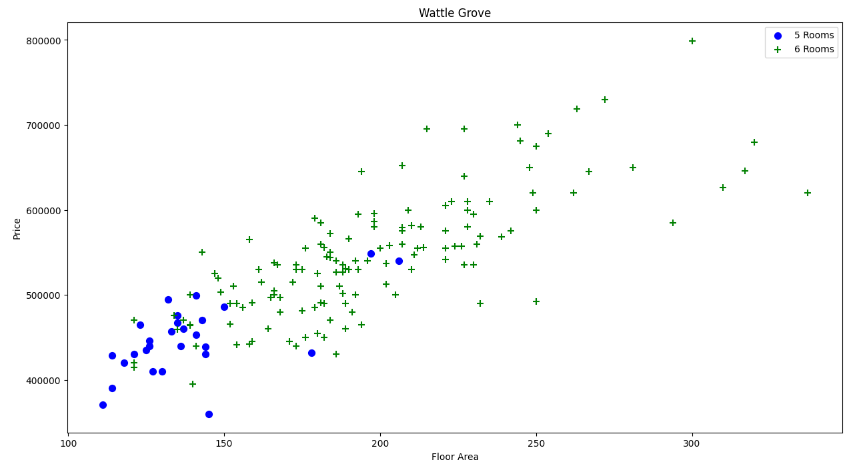 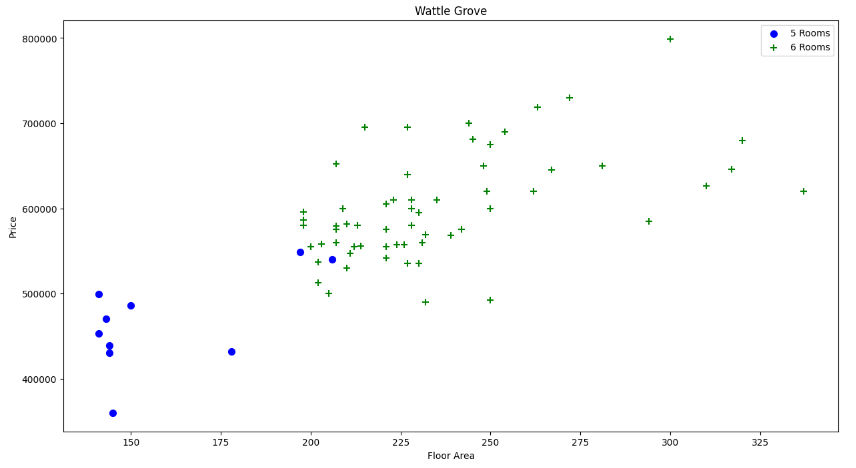

In [364]:
#drop unnecessary feature
df8 = df8.drop(['PRICE_PER_SQFT'], axis='columns')
df8.shape

(1693, 8)

In [365]:
#drop unnecessary feature
df8 = df8.drop(['TOTAL_ROOMS'], axis='columns')
df8.shape

(1693, 7)

**One Hot Encoding**

One-hot encode the 'SUBURB' column then drop 'SUBURB' column

In [366]:
dummies = pd.get_dummies(df8['SUBURB'])
df9 = pd.concat([df8, dummies], axis='columns')
df10 = df9.drop('SUBURB', axis='columns')
print(df10.head(3))

     PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
38  395000         6          2     2.0        565         168   
48  680000         6          3     8.0        692         290   
59  487500         4          3     4.0        701         217   

    Alexander Heights  Alfred Cove  Alkimos  Anketell  ...  Willetton  Wilson  \
38               True        False    False     False  ...      False   False   
48               True        False    False     False  ...      False   False   
59               True        False    False     False  ...      False   False   

    Winthrop  Woodbridge  Woodlands  Woodvale  Wooroloo  Yanchep  Yokine  \
38     False       False      False     False     False    False   False   
48     False       False      False     False     False    False   False   
59     False       False      False     False     False    False   False   

    other  
38  False  
48  False  
59  False  

[3 rows x 301 columns]


# Model Building

In [388]:
#Build Ridge Regression Model
X = df10.drop ('PRICE', axis='columns')
y = df10.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

#calculate R2 score
rr = Ridge()
rr.fit(X_train, y_train)
score = rr.score(X_test, y_test)
print(f'Model R^2 score: {score:.6f}')

Model R^2 score: 0.801591


In [390]:
#Use K-Fold to measure model accuracy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
cross_val_scores = cross_val_score(rr, X, y, cv=cv)
print('Cross-validation scores:')
for idx, score in enumerate(cross_val_scores, start=1):
    print(f'Fold {idx}: {score:.6f}')

Cross-validation scores:
Fold 1: 0.801591
Fold 2: 0.822832
Fold 3: 0.776675
Fold 4: 0.788911
Fold 5: 0.768998


In [394]:
#use GridSearchCV to compae against other ML models
def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_, 
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

print(find_best_model(X, y))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+13, tolerance: 2.563e+10
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+13, tolerance: 2.603e+10
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+13, tolerance: 2.558e

               model    best_score  \
0  linear_regression -2.077613e+14   
1              lasso  8.028653e-01   
2              ridge  8.051009e-01   
3      decision_tree  5.457589e-01   

                                         best_params  
0                                                 {}  
1               {'alpha': 10, 'selection': 'random'}  
2                    {'alpha': 0.1, 'solver': 'svd'}  
3  {'criterion': 'friedman_mse', 'splitter': 'ran...  


**The above result dictates that Ridge Regression yields the best score and as such will be used**

In [406]:
# Prediction function
def predict_price(SUBURB, BEDROOMS, BATHROOMS, GARAGE, LAND_AREA, FLOOR_AREA):
    suburb_index = np.where(X.columns == SUBURB)[0][0] if SUBURB in X.columns else -1
    x = np.zeros(len(X.columns))
    x[0] = BEDROOMS
    x[1] = BATHROOMS
    x[2] = GARAGE
    x[3] = LAND_AREA
    x[4] = FLOOR_AREA
    
    if suburb_index >= 0:
        x[suburb_index] = 1
    
    return rr.predict([x])[0]

# Model Testing

In [410]:
predicted_price = predict_price('Hilbert', 3, 2, 4, 700, 386)  
print(f'Predicted Price: ${predicted_price:.2f}')

predicted_price = predict_price('Hilbert', 3, 2, 4, 700, 500)  
print(f'Predicted Price: ${predicted_price:.2f}')

predicted_price = predict_price('Wattle Grove', 4, 3, 3, 700, 500)  
print(f'Predicted Price: ${predicted_price:.2f}')

predicted_price = predict_price('Hilbert', 2, 3, 3, 700, 500)  
print(f'Predicted Price: ${predicted_price:.2f}')

Predicted Price: $1038298.51
Predicted Price: $1338936.98
Predicted Price: $1555521.50
Predicted Price: $1400812.27


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
